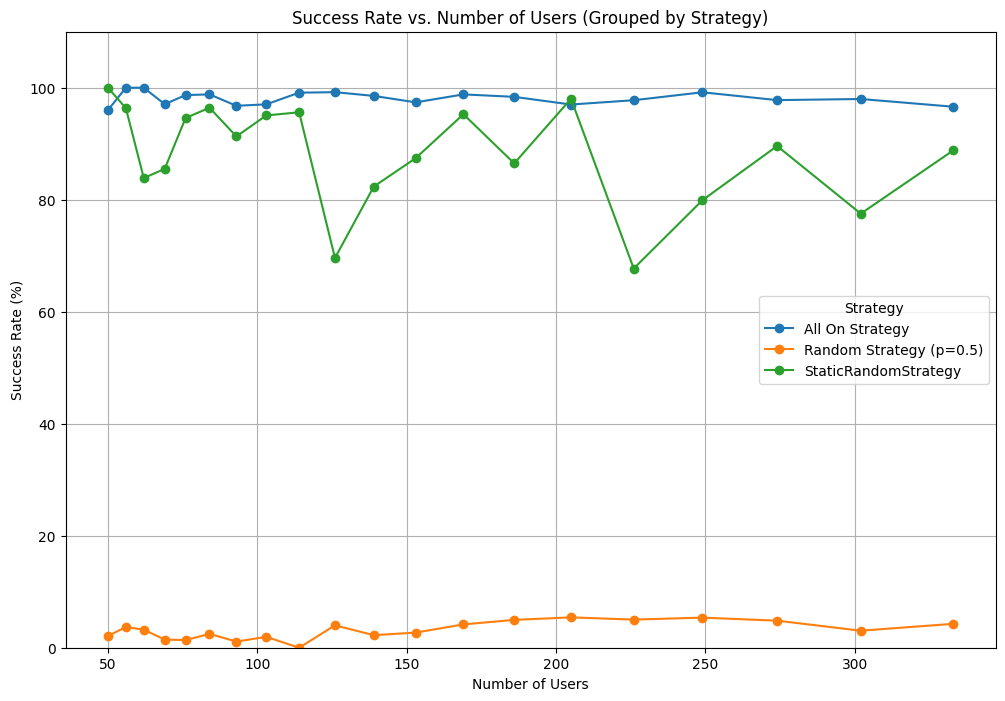

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

# Dictionary to hold dataframes grouped by strategy
dict_df = defaultdict(list)

# Read all request stats files
for file in glob.glob("../output/request_stats_*.csv"):
    # Extract strategy and user count from file name
    # Example filename: request_stats_All On Strategy_56.csv
    parts = file.split("_")
    strategy = parts[2]  # Strategy name
    user_count = int(parts[3].replace(".csv", ""))  # User count

    # Read the file into a DataFrame
    request_stats = pd.read_csv(file)

    # Store the data grouped by strategy
    dict_df[strategy].append((user_count, request_stats))

# Prepare the plot
plt.figure(figsize=(12, 8))

# Process each strategy
for strategy, data in dict_df.items():
    user_counts = []
    success_rates = []

    # Process each file for the strategy
    for user_count, request_stats in data:
        # Count the number of completed and failed requests
        completed_requests = request_stats[
            request_stats["status"] == "RequestStatus.COMPLETED"
        ].shape[0]
        failed_requests = request_stats[
            request_stats["status"] == "RequestStatus.FAILED"
        ].shape[0]

        # Calculate the success rate
        success_rate = (
            completed_requests / (completed_requests + failed_requests)
            if (completed_requests + failed_requests) > 0
            else 0
        )
        user_counts.append(user_count)
        success_rates.append(success_rate * 100)  # Convert to percentage

    # Sort the data by user count
    sorted_data = sorted(zip(user_counts, success_rates), key=lambda x: x[0])
    sorted_user_counts, sorted_success_rates = zip(*sorted_data)

    # Plot the data for the current strategy
    plt.plot(
        sorted_user_counts, sorted_success_rates, marker="o", linestyle="-", label=strategy
    )

# Finalize the plot
plt.title("Success Rate vs. Number of Users (Grouped by Strategy)")
plt.xlabel("Number of Users")
plt.ylabel("Success Rate (%)")
plt.ylim(0, 110)  # Ensure success rate stays between 0 and 100%
plt.legend(title="Strategy")
plt.grid()
plt.show()
